<a href="https://colab.research.google.com/github/ZeehanSharif/JAVA/blob/master/Fermilab_fluxInfo_Distribution_Data_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to make plots of the NuMI neutrino flux at the neutrino detectors

# Sofware

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Loading the input data


In [ ]:
files = glob.glob('/content/flux_info_g4numiv6_me000z200i_*_0001.csv')
df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

# Variables in each file
*   **NuType**: PDG code of the neutrino type. 14: muon neutrino, -14: muon antineutrino, etc.
*   **EnerNu_X**: neutrino energy (GeV) of the detector X (NOvA ND, NOvA FD, MINERvA)
*   **Wgt_X**: weight to applied to consider the probability of the neutrino pass through the detector X (NOvA ND, NOvA FD, MINERvA)
*   **ParType**: PDG code of the neutrino parent type. 211: pion plus, -211: pion minus, etc
*   **ParProdPt and ParProdPz**: transversal and longitudinal momentum of the neutrino parents when they are produced 
*  **ParDecPt and ParDecPz**: transversal and longitudinal momentum of the neutrino parents when they decay

Note: each data file has the result 500 000 sumulated protons colliding on the NuMI target (POT)





In [ ]:
df.head()


,NuType,EnerNu_NOvAND,Wgt_NOvAND,EnerNu_NOvAFD,Wgt_NOvAFD,EnerNu_MINERvA,Wgt_MINERvA,ParType,ParProdPt,ParProdPz,ParDecPt,ParDecPz
0,14,2.142950,0.001928,2.068950,2.191370e-09,3.306690,0.004213,211,0.154987,7.956390,0.012969,7.783260
1,14,0.745986,0.000057,0.672900,6.180790e-11,5.494970,0.002855,211,0.511715,29.909200,0.157436,29.741900
2,-14,0.203954,0.000004,0.176145,4.234730e-12,0.363042,0.000011,-211,0.954071,42.766800,0.959271,42.760000
3,14,15.473200,0.000738,15.903700,7.207620e-10,21.827200,0.001331,321,0.173945,23.374100,0.029868,23.162300
4,-14,0.066855,0.000003,0.067007,4.268840e-12,0.067075,0.000003,-211,0.111464,0.227941,0.110789,0.224917


*   Quick example: loop and apply conditional statements over a dataFrame

In [ ]:
a=0
b=0
for index,row in df.iterrows():
    b +=1 
    if(row['EnerNu_NOvAND']>50):  
      print(row['EnerNu_NOvAND'],row['NuType'],row['ParType'])
      a +=1
print('-> ',a,', ',b)

52.3552 14.0 321.0
50.4448 14.0 321.0
57.6337 14.0 321.0
52.6581 14.0 321.0
50.0727 14.0 321.0
56.8532 14.0 321.0
52.9908 14.0 321.0
50.4458 14.0 321.0
67.5927 14.0 321.0
50.3516 14.0 321.0
64.0437 -14.0 -321.0
51.9408 14.0 321.0
52.104 -14.0 -321.0
51.5646 14.0 321.0
50.2091 -14.0 -321.0
->  15 ,  2917562


# Data analysis 
*Subsets of the dataFrame with only one neutrino type 


In [ ]:
numu = df.loc[df['NuType'] == 14]
numubar = df.loc[df['NuType'] == -14]
nue = df.loc[df['NuType'] == 12]
nuebar = df.loc[df['NuType'] == -12]
kaon = df.loc[df['ParType'] == 321]
pion= df.loc[df['ParType'] == 211]
x = df['EnerNu_NOvAND']
stoND = np.array(x) 
y = df['EnerNu_NOvAFD']
stoFD = np.array(y)
numu.head()

,NuType,EnerNu_NOvAND,Wgt_NOvAND,EnerNu_NOvAFD,Wgt_NOvAFD,EnerNu_MINERvA,Wgt_MINERvA,ParType,ParProdPt,ParProdPz,ParDecPt,ParDecPz
0,14,2.142950,1.928320e-03,2.068950,2.191370e-09,3.306690,4.213160e-03,211,0.154987,7.956390,0.012969,7.783260
1,14,0.745986,5.714320e-05,0.672900,6.180790e-11,5.494970,2.855290e-03,211,0.511715,29.909200,0.157436,29.741900
3,14,15.473200,7.377810e-04,15.903700,7.207620e-10,21.827200,1.330540e-03,321,0.173945,23.374100,0.029868,23.162300
5,14,17.696700,6.743850e-04,16.682700,8.751530e-10,21.760200,9.424720e-04,321,0.336983,25.074300,0.160483,24.973900
8,14,0.007604,3.948070e-08,0.007623,5.948830e-14,0.007483,3.538400e-08,211,0.734341,0.202335,0.710260,0.194352


**Plotting the ratio of Neutrino energy ND/FD**

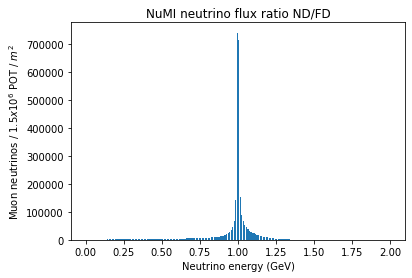

In [ ]:
ratio = stoND/stoFD
graphs = [ratio]
range = (0, 2)
bins = 200  
# plotting a histogram
plt.hist(graphs, bins, range, histtype = 'bar', rwidth = 0.8)
  
# x-axis label
plt.xlabel('Neutrino energy (GeV)')
# frequency label
plt.ylabel('Muon neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
# plot title
plt.title('NuMI neutrino flux ratio ND/FD')
  
# function to show the plot
plt.show()

*   Plotting the muon neutrino energy distribution for NOvA ND and MINERvA and NOvA FD


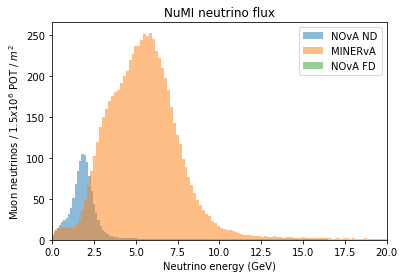

In [ ]:
numup = numu['EnerNu_NOvAND'].plot(xlim=(0,20),bins=500,kind="hist", weights=numu['Wgt_NOvAND'],label='NOvA ND', alpha=0.5)
numu['EnerNu_MINERvA'].plot(xlim=(0,20),bins=500,kind="hist", weights=numu['Wgt_MINERvA'],label='MINERvA',alpha=0.5, ax=numup)
numu['EnerNu_NOvAFD'].plot(xlim=(0,20),bins=500,kind="hist", weights=numu['Wgt_NOvAFD'],label='NOvA FD',alpha=0.5, ax=numup)
plt.ylabel('Muon neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
numup.legend();
plt.show()

*   Plotting the neutrino energy distributions for each neutrino type at NOvA ND

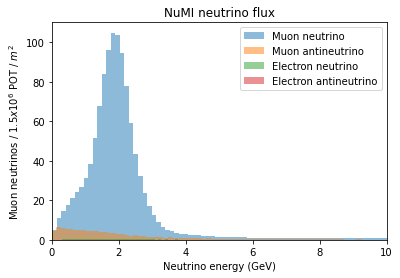

In [ ]:
nusp = numu['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=numu['Wgt_NOvAND'],label='Muon neutrino', alpha=0.5)
numubar['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=numubar['Wgt_NOvAND'],label='Muon antineutrino',alpha=0.5, ax=nusp)
nue['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=nue['Wgt_NOvAND'],label='Electron neutrino',alpha=0.5, ax=nusp)
nuebar['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=nuebar['Wgt_NOvAND'],label='Electron antineutrino',alpha=0.5, ax=nusp)
plt.ylabel('Muon neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
nusp.legend();
plt.show()

Plotting the neutrino energy distributions for each neutrino type at NOvA FD

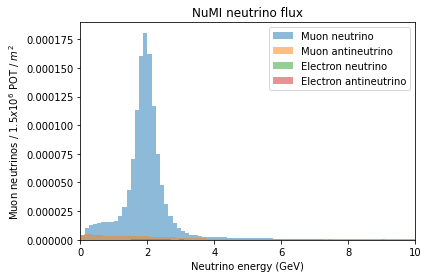

In [ ]:
nusp = numu['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=numu['Wgt_NOvAFD'],label='Muon neutrino', alpha=0.5)
numubar['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=numubar['Wgt_NOvAFD'],label='Muon antineutrino',alpha=0.5, ax=nusp)
nue['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=nue['Wgt_NOvAFD'],label='Electron neutrino',alpha=0.5, ax=nusp)
nuebar['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=nuebar['Wgt_NOvAFD'],label='Electron antineutrino',alpha=0.5, ax=nusp)
plt.ylabel('Muon neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
nusp.legend();
plt.show()

Plotting the neutrino energy distributions for each neutrino type at MINERvA

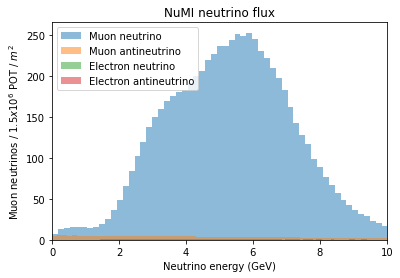

In [ ]:
nusp = numu['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=numu['Wgt_MINERvA'],label='Muon neutrino', alpha=0.5)
numubar['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=numubar['Wgt_MINERvA'],label='Muon antineutrino',alpha=0.5, ax=nusp)
nue['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=nue['Wgt_MINERvA'],label='Electron neutrino',alpha=0.5, ax=nusp)
nuebar['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=nuebar['Wgt_MINERvA'],label='Electron antineutrino',alpha=0.5, ax=nusp)
plt.ylabel('Muon neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
nusp.legend();
plt.show()

*   Y-Log scale: Plotting the neutrino energy distributions for each neutrino type at NOvA ND

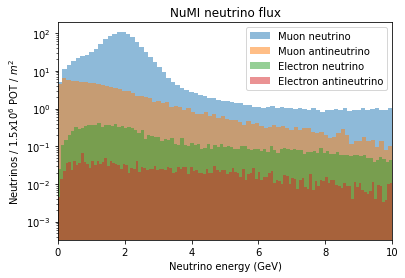

In [ ]:
nusp_l = numu['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=numu['Wgt_NOvAND'],label='Muon neutrino', alpha=0.5, logy=True)
numubar['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=numubar['Wgt_NOvAND'],label='Muon antineutrino',alpha=0.5, ax=nusp_l)
nue['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=nue['Wgt_NOvAND'],label='Electron neutrino',alpha=0.5, ax=nusp_l)
nuebar['EnerNu_NOvAND'].plot(xlim=(0,10),bins=500,kind="hist", weights=nuebar['Wgt_NOvAND'],label='Electron antineutrino',alpha=0.5, ax=nusp_l)
plt.ylabel('Neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
nusp_l.legend();
plt.show()

Y-Log scale: Plotting the neutrino energy distributions for each neutrino type at NOvA FD

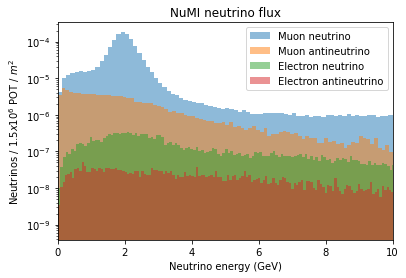

In [ ]:
nusp_l = numu['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=numu['Wgt_NOvAFD'],label='Muon neutrino', alpha=0.5, logy=True)
numubar['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=numubar['Wgt_NOvAFD'],label='Muon antineutrino',alpha=0.5, ax=nusp_l)
nue['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=nue['Wgt_NOvAFD'],label='Electron neutrino',alpha=0.5, ax=nusp_l)
nuebar['EnerNu_NOvAFD'].plot(xlim=(0,10),bins=500,kind="hist", weights=nuebar['Wgt_NOvAFD'],label='Electron antineutrino',alpha=0.5, ax=nusp_l)
plt.ylabel('Neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
nusp_l.legend();
plt.show()

Y-Log scale: Plotting the neutrino energy distributions for each neutrino type at MINERvA

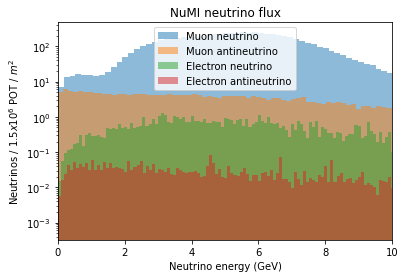

In [ ]:
nusp_l = numu['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=numu['Wgt_MINERvA'],label='Muon neutrino', alpha=0.5, logy=True)
numubar['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=numubar['Wgt_MINERvA'],label='Muon antineutrino',alpha=0.5, ax=nusp_l)
nue['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=nue['Wgt_MINERvA'],label='Electron neutrino',alpha=0.5, ax=nusp_l)
nuebar['EnerNu_MINERvA'].plot(xlim=(0,10),bins=500,kind="hist", weights=nuebar['Wgt_MINERvA'],label='Electron antineutrino',alpha=0.5, ax=nusp_l)
plt.ylabel('Neutrinos / $1.5x10^{6}$ POT / $m^{2}$')
plt.xlabel('Neutrino energy (GeV)')
plt.title('NuMI neutrino flux')
nusp_l.legend();
plt.show()

*   Plotting kinematic of the muon neutrino parents when they are born

Text(0.5, 0.98, 'Muon neutrino parents when they are born (NOvA ND)')

<Figure size 432x288 with 0 Axes>

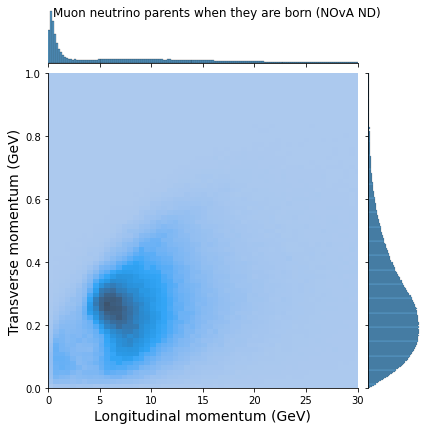

In [ ]:
plt.clf()
prod=sns.jointplot(data=numu, x='ParProdPz',y='ParProdPt', xlim=(0,30), ylim=(0,1), kind = 'hist', weights=numu.Wgt_NOvAND, bins=200)
prod.set_axis_labels('Longitudinal momentum (GeV)', 'Transverse momentum (GeV)', fontsize=14)
prod.fig.suptitle("Muon neutrino parents when they are born (NOvA ND)")

Text(0.5, 0.98, 'Muon neutrino parents when they are born (NOvA FD)')

<Figure size 432x288 with 0 Axes>

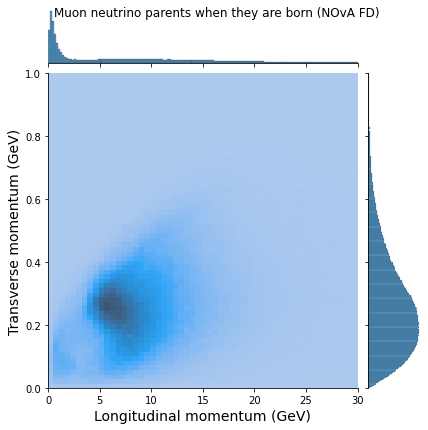

In [ ]:
plt.clf()
prod=sns.jointplot(data=numu, x='ParProdPz',y='ParProdPt', xlim=(0,30), ylim=(0,1), kind = 'hist', weights=numu.Wgt_NOvAFD, bins=200)
prod.set_axis_labels('Longitudinal momentum (GeV)', 'Transverse momentum (GeV)', fontsize=14)
prod.fig.suptitle("Muon neutrino parents when they are born (NOvA FD)")

*   Plotting kinematic of the muon neutrino parents when they decay

Text(0.5, 0.98, 'Muon neutrino parents when they decay (NOvA ND)')

<Figure size 432x288 with 0 Axes>

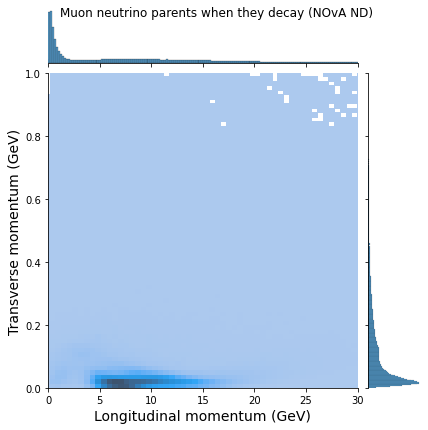

In [ ]:
plt.clf()
dec=sns.jointplot(data=numu, x='ParDecPz',y='ParDecPt', xlim=(0,30), ylim=(0,1), kind = 'hist', weights=numu.Wgt_NOvAND, bins=200)
dec.set_axis_labels('Longitudinal momentum (GeV)', 'Transverse momentum (GeV)', fontsize=14)
dec.fig.suptitle("Muon neutrino parents when they decay (NOvA ND)")

Text(0.5, 0.98, 'Muon neutrino parents when they decay (NOvA FD)')

<Figure size 432x288 with 0 Axes>

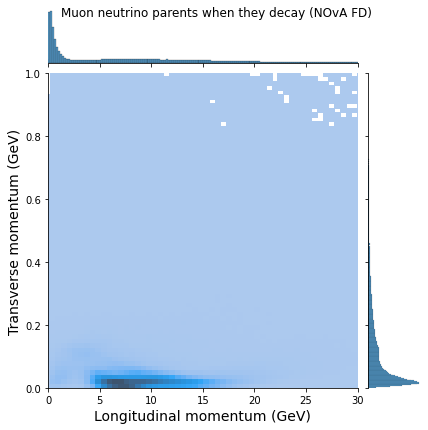

In [ ]:
plt.clf()
dec=sns.jointplot(data=numu, x='ParDecPz',y='ParDecPt', xlim=(0,30), ylim=(0,1), kind = 'hist', weights=numu.Wgt_NOvAFD, bins=200)
dec.set_axis_labels('Longitudinal momentum (GeV)', 'Transverse momentum (GeV)', fontsize=14)
dec.fig.suptitle("Muon neutrino parents when they decay (NOvA FD)")

Plots to do


1.   NOvA ND and NOvA FD w.r.t. neutrino energy for the muon neutrino. Make also the ratio FD/ND
2.   Muon neutrino parents when it is pions and kaons when they are born and when they decay



Text(0.5, 0.98, 'Kaon neutrino parents when they are born (NOvA ND)')

<Figure size 432x288 with 0 Axes>

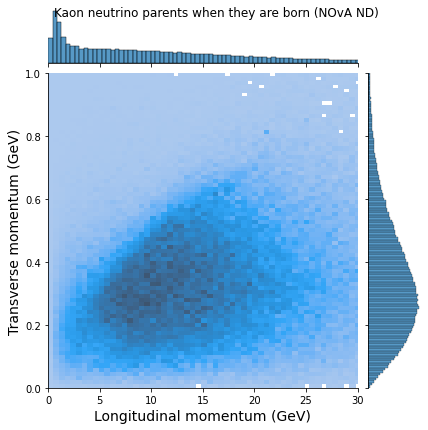

In [ ]:
plt.clf()
prod=sns.jointplot(data=kaon, x='ParProdPz',y='ParProdPt', xlim=(0,30), ylim=(0,1), kind = 'hist', weights=kaon.Wgt_NOvAND, bins=200)
prod.set_axis_labels('Longitudinal momentum (GeV)', 'Transverse momentum (GeV)', fontsize=14)
prod.fig.suptitle("Kaon neutrino parents when they are born (NOvA ND)")

Text(0.5, 0.98, 'Pion neutrino parents when they are born (NOvA ND)12')

<Figure size 432x288 with 0 Axes>

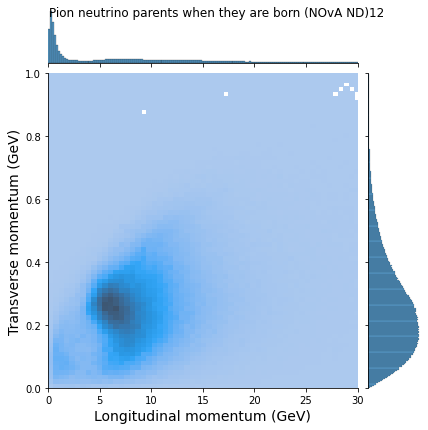

In [ ]:
plt.clf()
prod=sns.jointplot(data=pion, x='ParProdPz',y='ParProdPt', xlim=(0,30), ylim=(0,1), kind = 'hist', weights=pion.Wgt_NOvAND, bins=200)
prod.set_axis_labels('Longitudinal momentum (GeV)', 'Transverse momentum (GeV)', fontsize=14)
prod.fig.suptitle("Pion neutrino parents when they are born (NOvA ND)12")

Text(0.5, 0.98, 'Kaon neutrino parents when they decay (NOvA ND)')

<Figure size 432x288 with 0 Axes>

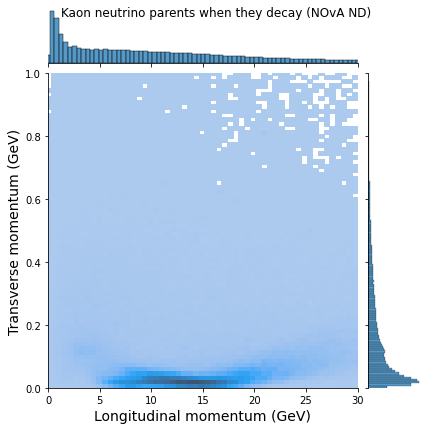

In [ ]:
plt.clf()
dec=sns.jointplot(data=kaon, x='ParDecPz',y='ParDecPt', xlim=(0,30), 
ylim=(0,1), kind = 'hist', weights=kaon.Wgt_NOvAND, bins=200)
dec.set_axis_labels('Longitudinal momentum (GeV)', 
'Transverse momentum (GeV)', fontsize=14)
dec.fig.suptitle("Kaon neutrino parents when they decay (NOvA ND)")

Text(0.5, 0.98, 'Pion neutrino parents when they decay (NOvA ND)')

<Figure size 432x288 with 0 Axes>

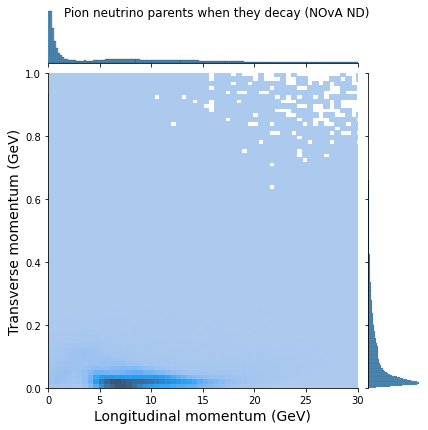

In [ ]:
plt.clf()
dec=sns.jointplot(data=pion, x='ParDecPz',y='ParDecPt', xlim=(0,30), 
ylim=(0,1), kind = 'hist', weights=pion.Wgt_NOvAND, bins=200)
dec.set_axis_labels('Longitudinal momentum (GeV)', 
'Transverse momentum (GeV)', fontsize=14)
dec.fig.suptitle("Pion neutrino parents when they decay (NOvA ND)")